In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, classification_report

In [2]:
data = pd.read_csv("C:/Users/oQKo/Desktop/資料擷取_homework/heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


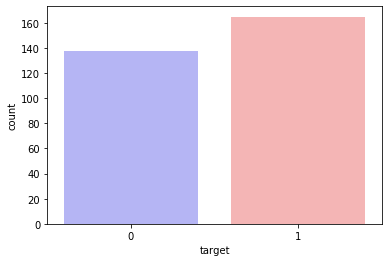

In [4]:
sns.countplot(x="target", data=data, palette="bwr")
plt.show()

In [5]:
data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


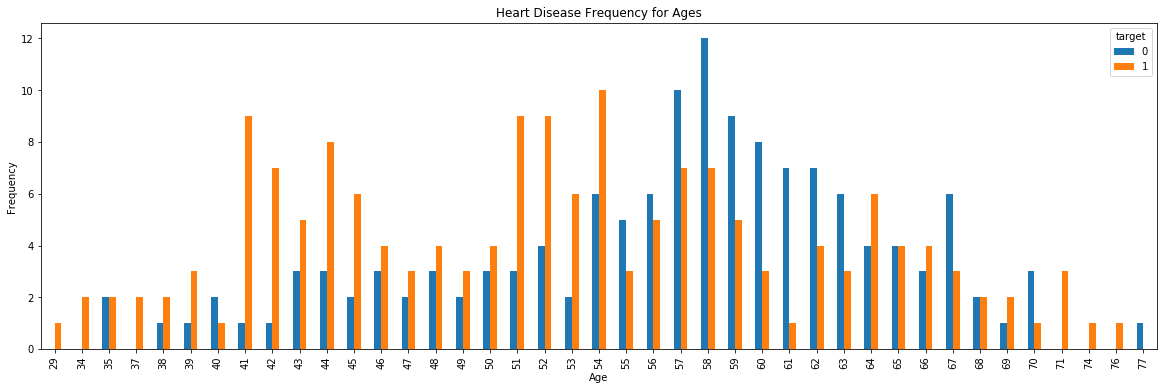

In [6]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

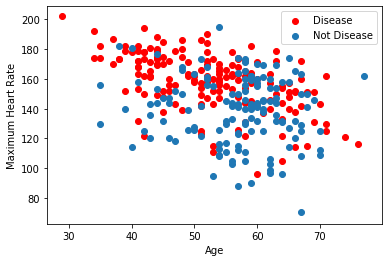

In [7]:
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c="red")
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

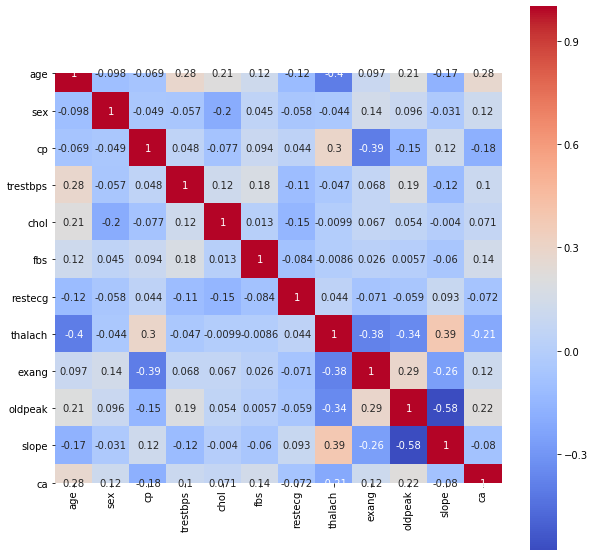

In [8]:
features_mean= list(data.columns[0:12])
plt.figure(figsize=(10,10))
sns.heatmap(data[features_mean].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

In [9]:
y = data.target.values
x_data = data.drop(['target'], axis = 1)

In [10]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [12]:
accuracies = {}
rf = RandomForestClassifier(n_estimators = 51, min_samples_leaf=1, min_samples_split=4)
rf.fit(x_train, y_train)

acc = rf.score(x_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 88.52%


In [13]:
from sklearn.model_selection import GridSearchCV #調參

In [27]:
param_test1 = {'n_estimators':range(1,1001, 100)}
test1 = GridSearchCV(estimator = RandomForestClassifier(min_samples_leaf=2, min_samples_split=4), param_grid = param_test1, scoring='roc_auc',iid=False, cv=5)
test1.fit(x_train,y_train)
print(test1.best_params_, test1.best_score_)

{'n_estimators': 801} 0.9034767969550577


In [28]:
param_test1 = {'max_depth':range(1,20,2), 'min_samples_split':range(10,201,20)}
test1 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 801, min_samples_leaf=2), param_grid = param_test1, scoring='roc_auc',iid=False, cv=5)
test1.fit(x_train,y_train)
print(test1.best_params_, test1.best_score_)

{'max_depth': 13, 'min_samples_split': 130} 0.9087263380741641


In [29]:
rf = RandomForestClassifier(n_estimators = 801,max_depth=13, min_samples_leaf=2, min_samples_split=130)
rf.fit(x_train, y_train)
acc = rf.score(x_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 86.89%


In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
y_predict = rf.predict(x_test)
cm_rf = confusion_matrix(y_test,y_predict)
recall = recall_score(y_test, y_predict)

print(recall)
print(classification_report(y_test, y_predict))

0.9411764705882353
              precision    recall  f1-score   support

           0       0.91      0.78      0.84        27
           1       0.84      0.94      0.89        34

    accuracy                           0.87        61
   macro avg       0.88      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61



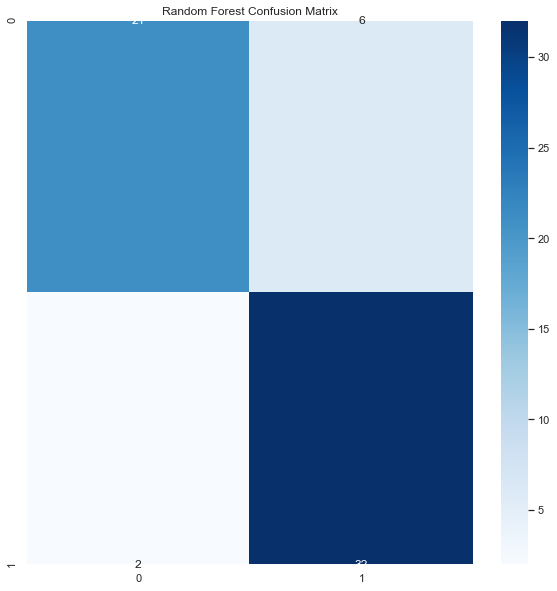

In [32]:
sns.set(font_scale=1)
plt.figure(figsize=(10,10))
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf, annot=True,cmap="Blues",fmt="d")
plt.show()